In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
# Extracting the variables
X = data.iloc[:,[2,3]].values
Y = data.iloc[:,4].values

In [4]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.25,random_state=0)

In [5]:
# scaling the independent data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train =sc.fit_transform(X_train)
X_test = sc.transform(X_test)

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


**Step 2 - fitting**

In [6]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train,Y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=0, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [7]:
# Predicting the model with X_test values
y_pred = classifier.predict(X_test)

In [8]:
# Evaluating the model with confusion matrix
from sklearn.metrics import confusion_matrix
# here confusion_matrix is a function
cm = confusion_matrix(Y_test,y_pred)
cm

array([[65,  3],
       [ 8, 24]])

1. True positive = 65
2. True negative = 24
3. False positive = 3
4. False negative = 8

total = 100 | correct predictions = 89

accuracy = 89%

**Visualization**

In [33]:
fig = plt.figure(figsize=(10,5))
data0 = data[data['Purchased']==0][['Age','EstimatedSalary']]
data1 = data[data['Purchased']==1][['Age','EstimatedSalary']]
# features of people who didnot buy 
Y0 = sc.transform(np.array(data0).reshape(-1,2))
Y1 = sc.transform(np.array(data1).reshape(-1,2))

/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


Text(0,0.5,'Salary')

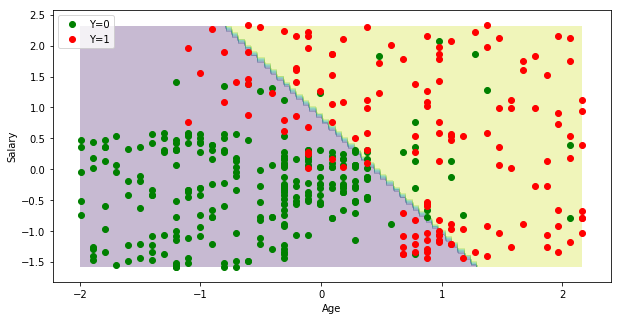

In [81]:
# plotting the classification
x1 = X_train[:,0]
x2 = X_train[:,1]
x1_pixel = np.arange(min(x1),max(x1),step=0.01)
x2_pixel = np.arange(min(x2),max(x2),step=0.1)
n1 = len(x1_pixel)
n2 = len(x2_pixel)

X1_grid,X2_grid = np.meshgrid(x1_pixel,x2_pixel)
Y_grid = np.zeros((n2,n1))
for i in range(n1):
    for j in range(n2):
        predict = np.array([x1_pixel[i],x2_pixel[j]]).reshape(1,2)
        Y_grid[j,i] = classifier.predict(predict)


fig = plt.figure(figsize=(10,5))        
plt.contourf(X1_grid,X2_grid,Y_grid,alpha=0.3)
plt.scatter(Y0[:,0],Y0[:,1],color='green',label='Y=0')
plt.scatter(Y1[:,0],Y1[:,1],color='red',label='Y=1')
plt.legend()
plt.xlabel('Age')
plt.ylabel('Salary')

This how our **Linear** classification model looks like